#### About Dataset
This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning. The following descriptions are adapted from the UCI webpage: These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

#### The attributes are:
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

#### Import Dataset & Liberaries

In [14]:
import numpy as np
import pandas as pd 
import os 
import warnings 
warnings.filterwarnings('ignore')

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harrywang/wine-dataset-for-clustering")

print(os.listdir(path))

['wine-clustering.csv']


In [6]:
df = pd.read_csv(os.path.join(path,'wine-clustering.csv'))
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Steps to Work on 
1. Choose K Decide how many clusters you want.

2. Pick random centroids Random points are selected as temporary cluster centers.

3. Assign points to nearest centroid Each data point goes to the closest centroid (distance is usually Euclidean distance).

4. Update centroids Take the mean of all points in each cluster → move centroid there.

5. Repeat Steps 3 & 4 repeat until centroids stop moving.

In [8]:
df1 = df

df1.shape

(178, 13)

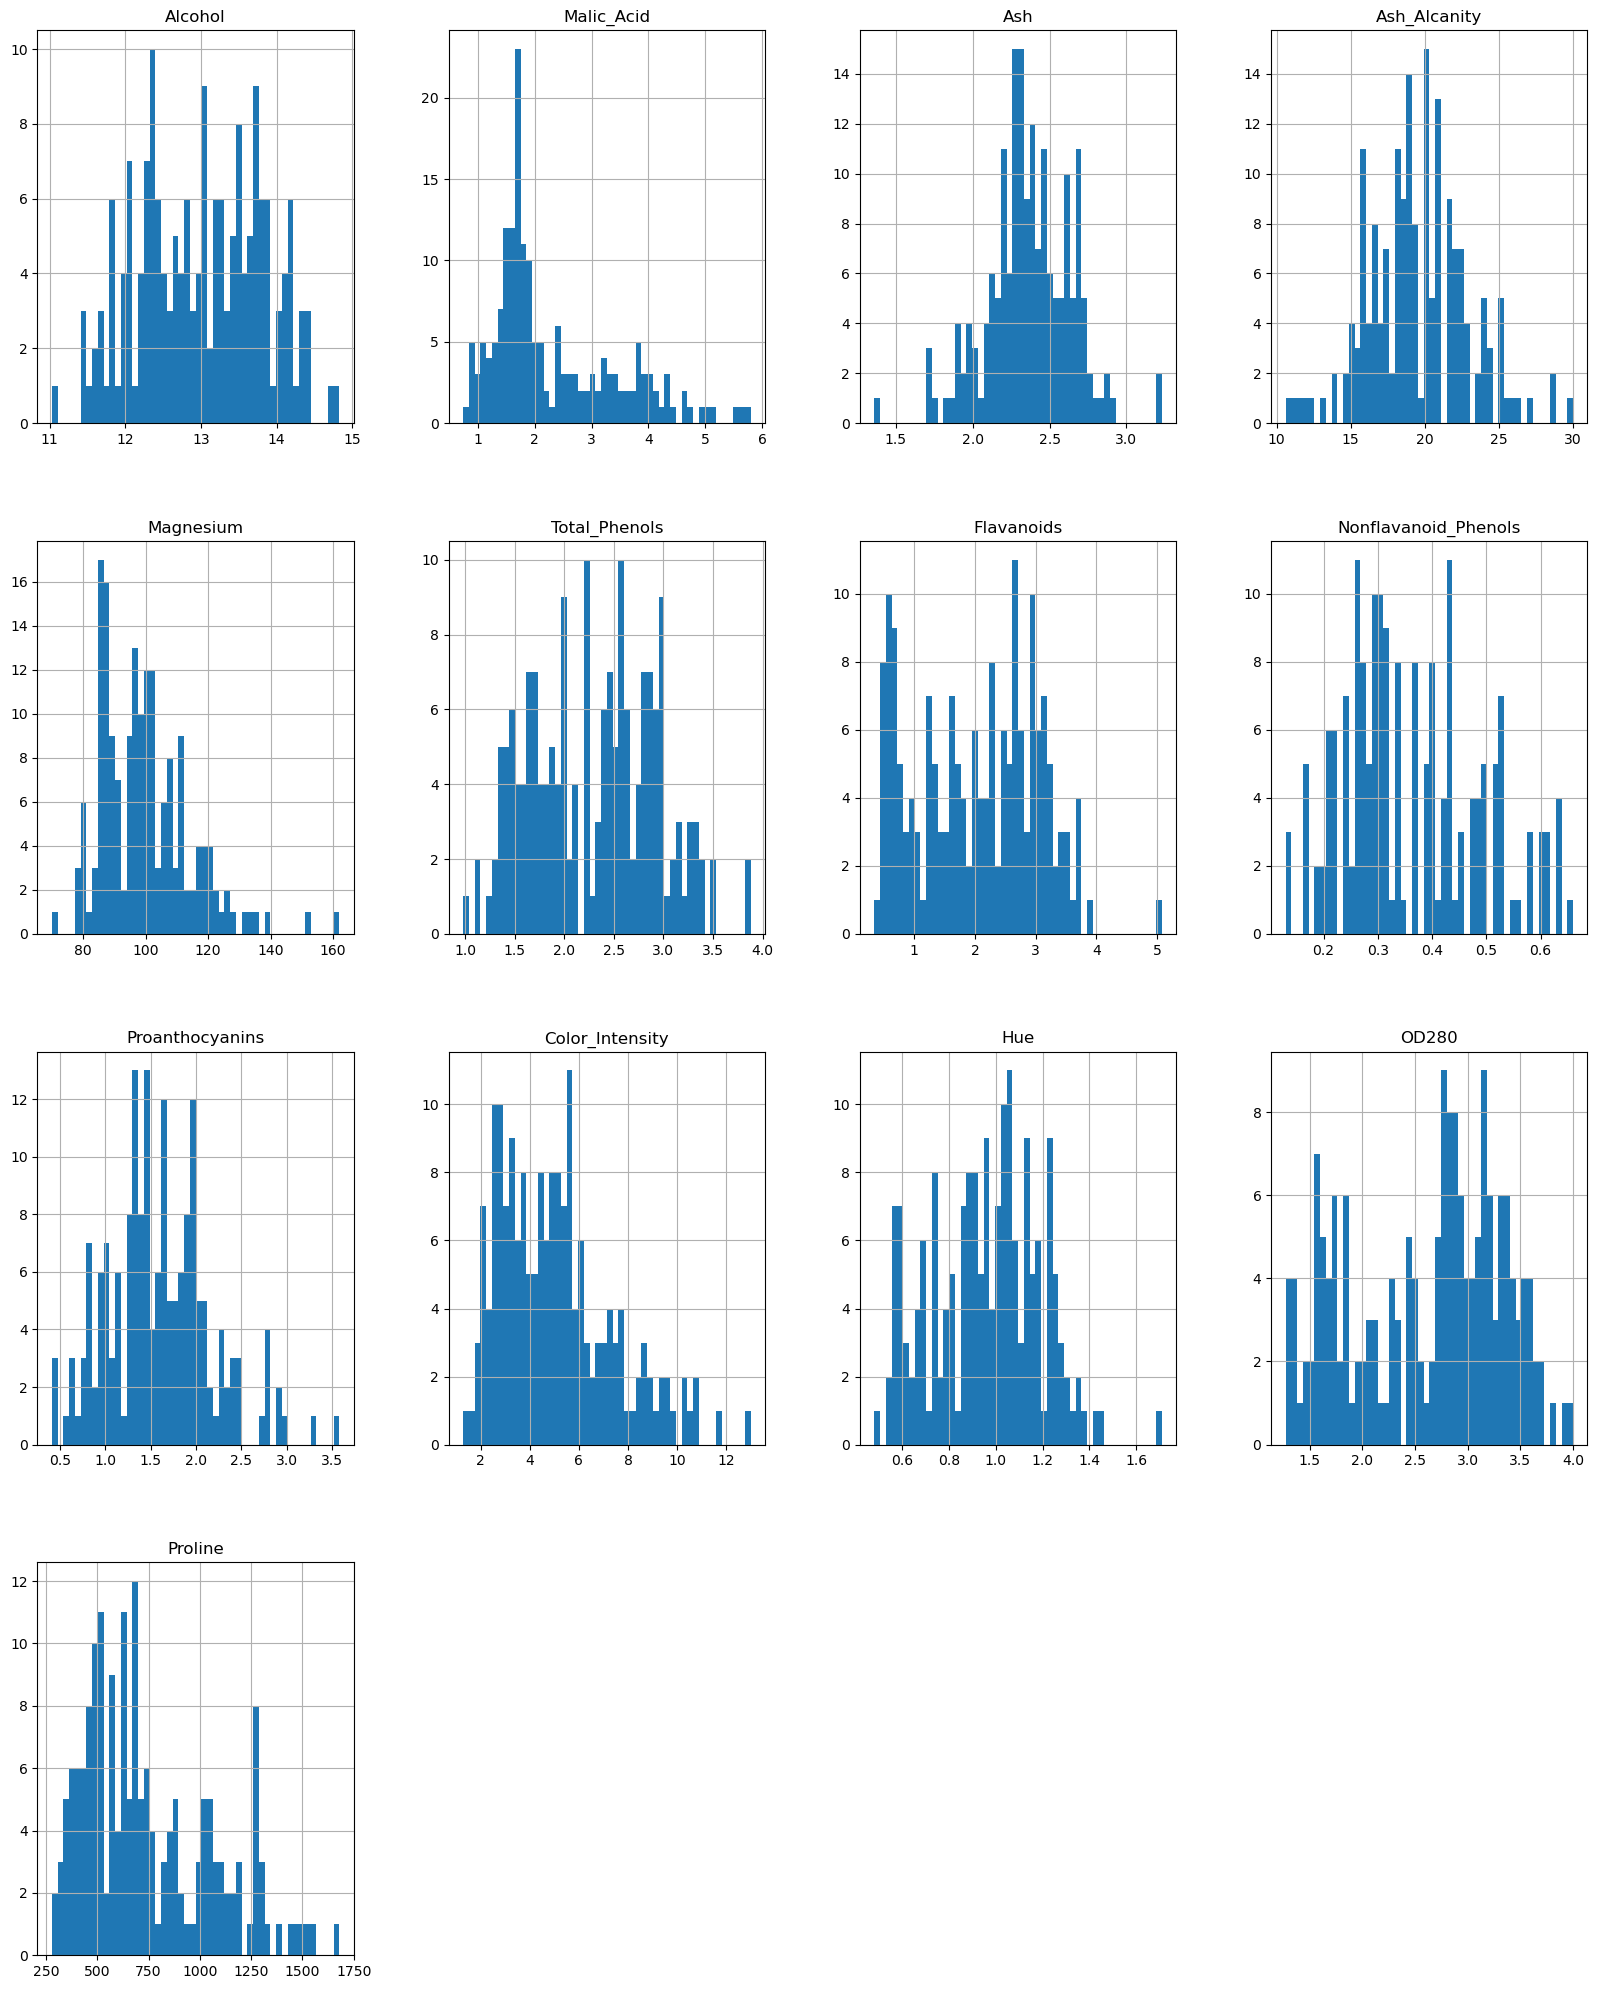

In [9]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,25))
plt.show()

In [10]:
from sklearn.cluster import KMeans


In [15]:
wcss = []

for i in range(1,17):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

wcss

[17592296.383508474,
 4545746.292099379,
 2370689.686782968,
 1337029.4929415903,
 990455.2159522269,
 681524.3140562385,
 412303.8282508013,
 361685.3231580457,
 306658.0211406638,
 238859.78808584617,
 248675.95774102624,
 191809.88478716466,
 143623.90914302954,
 123458.58463279033,
 111885.72326724503,
 104787.07590558592]

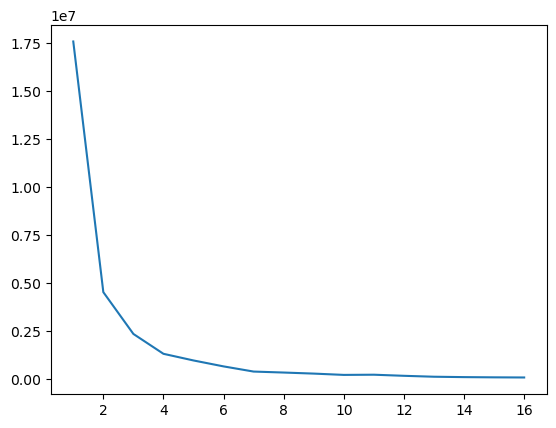

In [16]:
plt.plot(range(1,17),wcss)

In [17]:
X = df.iloc[:,:].values
km= KMeans(n_clusters=7)
y_mean = km.fit_predict(X)


In [18]:
y_mean

array([0, 0, 6, 2, 3, 2, 6, 6, 0, 0, 2, 6, 6, 0, 2, 6, 6, 0, 2, 5, 5, 5,
       0, 0, 5, 5, 6, 6, 5, 0, 6, 2, 0, 6, 0, 5, 5, 0, 0, 5, 5, 0, 0, 3,
       5, 0, 0, 0, 0, 6, 0, 6, 6, 6, 0, 0, 0, 6, 6, 1, 3, 1, 3, 4, 4, 3,
       1, 1, 3, 3, 5, 4, 1, 0, 5, 4, 4, 1, 3, 1, 4, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 4, 4, 5, 3, 4, 3, 4, 3, 1, 4, 4, 3, 4, 1, 1, 4, 3,
       1, 4, 3, 4, 4, 4, 1, 4, 4, 1, 3, 1, 4, 4, 4, 4, 4, 1, 4, 1, 3, 1,
       1, 3, 3, 3, 3, 1, 1, 1, 3, 5, 1, 1, 5, 5, 4, 3, 3, 1, 1, 1, 4, 3,
       3, 3, 1, 5, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 5,
       5, 1], dtype=int32)

#### K-Means from Scratch
Instead of sklearn, we can build it manually using NumPy.
#### Basic structure:
Create a KMeans class
Inputs:
1. n_clusters
2. max_iter
3. Key logic:
4. Randomly initialize centroids
5. Assign points to nearest centroid
6. Update centroids using mean
7. Repeat until convergence

⚠️ Because centroids start randomly:

#### Results may vary
That’s why multiple runs or higher iterations are used

In [19]:
from sklearn.datasets import make_blobs


In [20]:
centroids = [(-5,-5),(5,5),(-5,5),(5,-5),]
cluster_std = [1,1,1,1]

In [21]:
X,y = make_blobs(n_samples=100, cluster_std=cluster_std, 
                 centers=centroids,n_features=2,random_state=2)


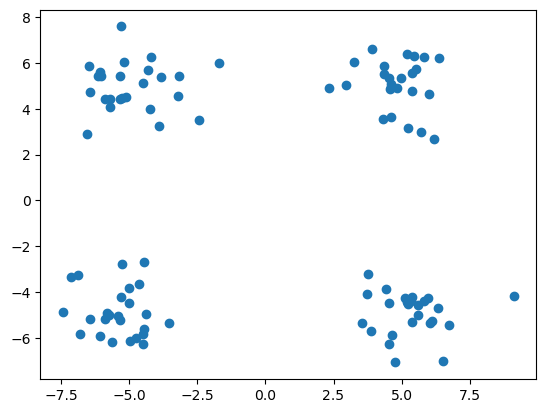

In [22]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [23]:
import random

In [ ]:
class KMeans:
    def __init__(self, n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):
        random_idx = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_idx]

        for i in range(self.max_iter):
            cluster_gp = self.assign_cluster(X)
            old_centroid = self.centroids

            self.centroids = self.move_centroids(X,cluster_gp)

            if (old_centroid == self.centroids).all():
                break
        return cluster_gp
    
    def assign_clusters(self,X):
        cluster_gp=[]
        distances =[]

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_dist = min(distances)
            idx_pos = distances.index(min_dist)
            cluster_gp.append(idx_pos)
            distances.clear()

        return np.array(cluster_gp)

    def move_centroids(self,X,cluster_gp):
        new_centroid = []
        cluster_type=np.unique(cluster_gp)
        for type in cluster_type :
            new_centroid.append(X[cluster_gp==type].mean(axis=0))

        return np.array(new_centroid)

In [25]:
km = KMeans(n_clusters=4,max_iter=100)
y_means= km.fit_predict(X)

AttributeError: 'KMeans' object has no attribute 'assign_cluster'

In [ ]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='r')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='b')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='y')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color='g')
plt.show()